In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [189]:
df = pd.read_csv("Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [190]:
df.shape

(1000, 40)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [192]:
#drop this column because its 100% of null value and this columns is not impacting also.
df.drop(['_c39'],axis=1,inplace=True)

In [193]:
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y


In [194]:
df_visualization_nominal=df[['months_as_customer', 'age', 'policy_number',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported']].copy()

In [195]:
df_visualization_nominal.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


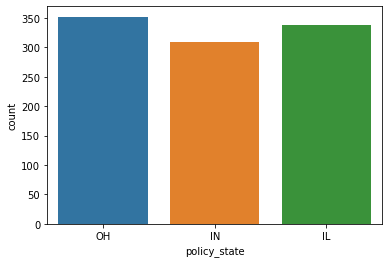

In [196]:
ax = sns.countplot(x="policy_state", data=df_visualization_nominal)
print(df_visualization_nominal["policy_state"].value_counts())

We are showing state wise data as we can see our OH on 352, IL is 338, IN is 310.

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


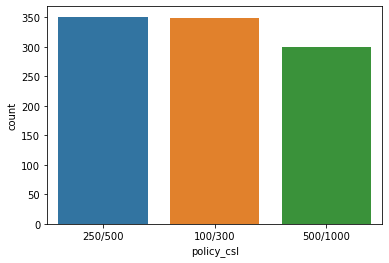

In [197]:
ax = sns.countplot(x="policy_csl", data=df_visualization_nominal)
print(df_visualization_nominal["policy_csl"].value_counts())

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


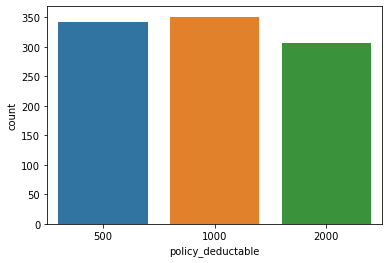

In [198]:
ax = sns.countplot(x="policy_deductable", data=df_visualization_nominal)
print(df_visualization_nominal["policy_deductable"].value_counts())

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


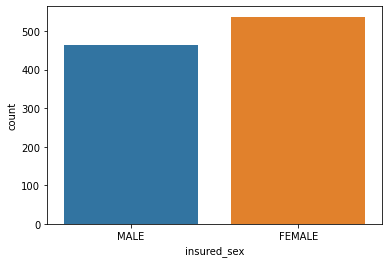

In [199]:
ax = sns.countplot(x="insured_sex", data=df_visualization_nominal)
print(df_visualization_nominal["insured_sex"].value_counts())

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


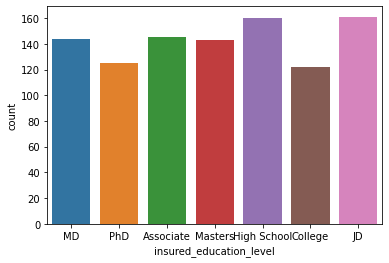

In [200]:
ax = sns.countplot(x="insured_education_level", data=df_visualization_nominal)
print(df_visualization_nominal["insured_education_level"].value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


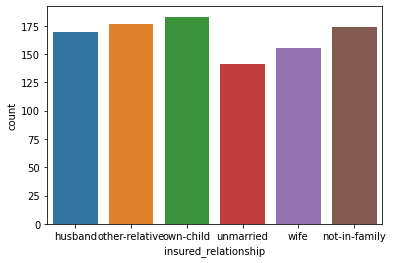

In [201]:
ax = sns.countplot(x="insured_relationship", data=df_visualization_nominal)
print(df_visualization_nominal["insured_relationship"].value_counts())

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


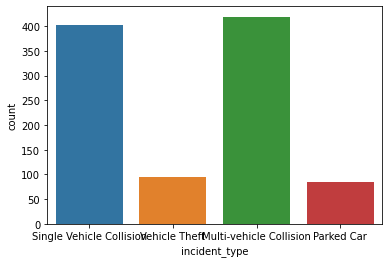

In [202]:
ax = sns.countplot(x="incident_type", data=df_visualization_nominal)
print(df_visualization_nominal["incident_type"].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


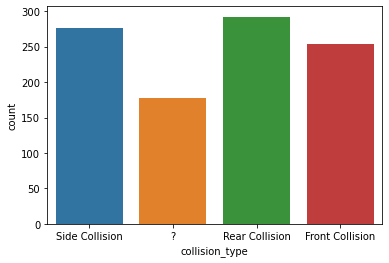

In [203]:
ax = sns.countplot(x="collision_type", data=df_visualization_nominal)
print(df_visualization_nominal["collision_type"].value_counts())

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


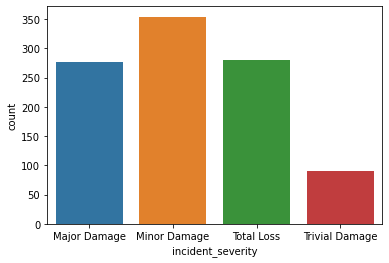

In [204]:
ax = sns.countplot(x="incident_severity", data=df_visualization_nominal)
print(df_visualization_nominal["incident_severity"].value_counts())

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


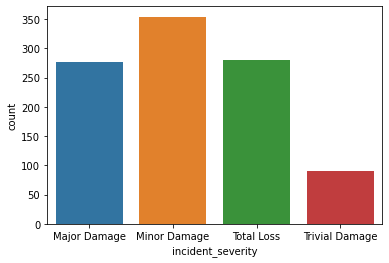

In [205]:
ax = sns.countplot(x="incident_severity", data=df_visualization_nominal)
print(df_visualization_nominal["incident_severity"].value_counts())

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


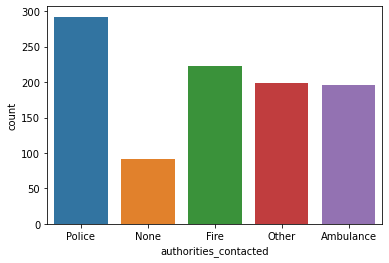

In [206]:
ax = sns.countplot(x="authorities_contacted", data=df_visualization_nominal)
print(df_visualization_nominal["authorities_contacted"].value_counts())

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


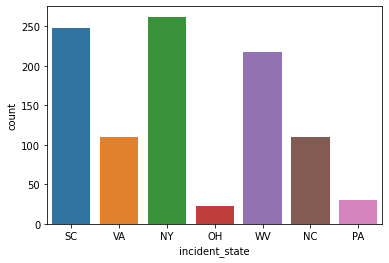

In [207]:
ax = sns.countplot(x="incident_state", data=df_visualization_nominal)
print(df_visualization_nominal["incident_state"].value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


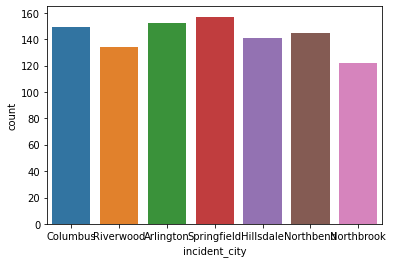

In [208]:
ax = sns.countplot(x="incident_city", data=df_visualization_nominal)
print(df_visualization_nominal["incident_city"].value_counts())

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


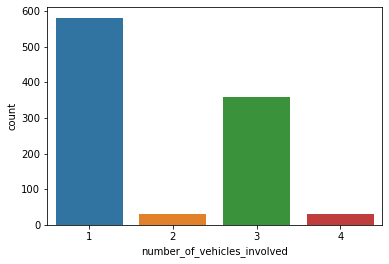

In [209]:
ax = sns.countplot(x="number_of_vehicles_involved", data=df_visualization_nominal)
print(df_visualization_nominal["number_of_vehicles_involved"].value_counts())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


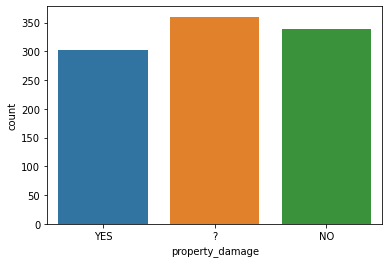

In [210]:
ax = sns.countplot(x="property_damage", data=df_visualization_nominal)
print(df_visualization_nominal["property_damage"].value_counts())

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


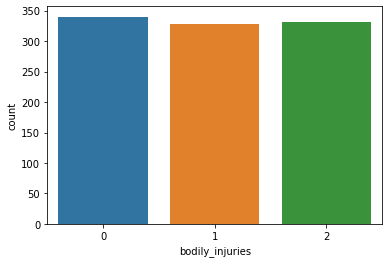

In [211]:
ax = sns.countplot(x="bodily_injuries", data=df_visualization_nominal)
print(df_visualization_nominal["bodily_injuries"].value_counts())

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


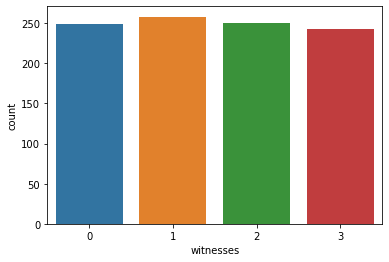

In [212]:
ax = sns.countplot(x="witnesses", data=df_visualization_nominal)
print(df_visualization_nominal["witnesses"].value_counts())

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


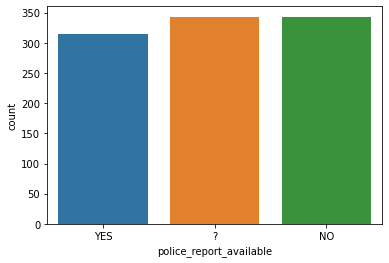

In [213]:
ax = sns.countplot(x="police_report_available", data=df_visualization_nominal)
print(df_visualization_nominal["police_report_available"].value_counts())

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


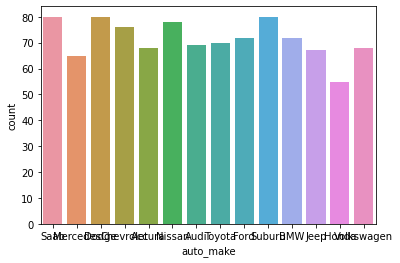

In [214]:
ax = sns.countplot(x="auto_make", data=df_visualization_nominal)
print(df_visualization_nominal["auto_make"].value_counts())

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


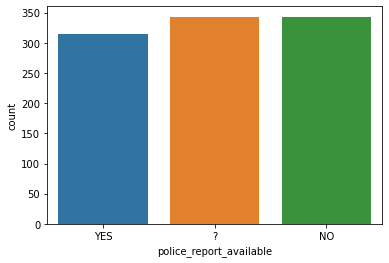

In [215]:
ax = sns.countplot(x="police_report_available", data=df_visualization_nominal)
print(df_visualization_nominal["police_report_available"].value_counts())

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


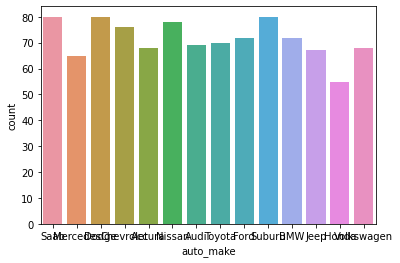

In [216]:
ax = sns.countplot(x="auto_make", data=df_visualization_nominal)
print(df_visualization_nominal["auto_make"].value_counts())

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
Camry             28
92x               28
Forrestor         28
95                27
F150              27
E400              27
93                25
Grand Cherokee    25
Tahoe             24
Maxima            24
Escape            24
X5                23
Ultima            23
Civic             22
Silverado         22
Highlander        22
Fusion            21
Impreza           20
CRV               20
ML350             20
TL                20
Corolla           20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


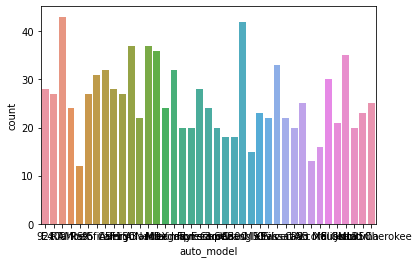

In [217]:
ax = sns.countplot(x="auto_model", data=df_visualization_nominal)
print(df_visualization_nominal["auto_model"].value_counts())

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


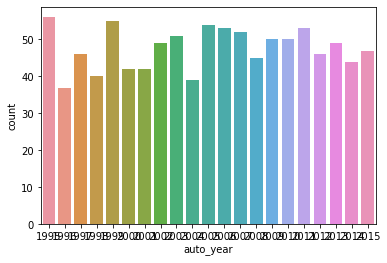

In [218]:
ax = sns.countplot(x="auto_year", data=df_visualization_nominal)
print(df_visualization_nominal["auto_year"].value_counts())

N    753
Y    247
Name: fraud_reported, dtype: int64


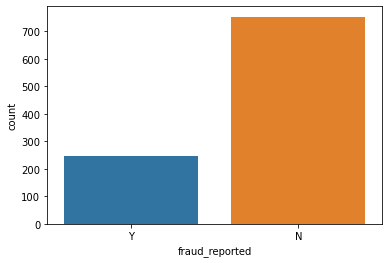

In [219]:
ax = sns.countplot(x="fraud_reported", data=df_visualization_nominal)
print(df_visualization_nominal["fraud_reported"].value_counts())

here is the percentage of FRAUD REPORT either YES or NO customers data.

# Filling All NaN and ? Values

In [220]:
# Here we are encode some data which is need to encode it.and make a list and do encode also.
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df['policy_state']=le.fit_transform(df['policy_state'])
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['insured_sex']=le.fit_transform(df['insured_sex'])
df['insured_education_level']=le.fit_transform(df['insured_education_level'])
df['insured_occupation']=le.fit_transform(df['insured_occupation'])
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])
df['insured_relationship']=le.fit_transform(df['insured_relationship'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['collision_type']=le.fit_transform(df['collision_type'])
df['incident_severity']=le.fit_transform(df['incident_severity'])
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_state']=le.fit_transform(df['incident_state'])
df['incident_city']=le.fit_transform(df['incident_city'])
df['incident_location']=le.fit_transform(df['incident_location'])
df['property_damage']=le.fit_transform(df['property_damage'])
df['police_report_available']=le.fit_transform(df['police_report_available'])
df['auto_make']=le.fit_transform(df['auto_make'])
df['auto_model']=le.fit_transform(df['auto_model'])
df['fraud_reported']=le.fit_transform(df['fraud_reported'])
df['incident_date']=le.fit_transform(df['incident_date'])
df['policy_bind_date']=le.fit_transform(df['policy_bind_date'])
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int32  
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   int32  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int32  
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   int32  
 13  insured_hobbies    

<AxesSubplot:>

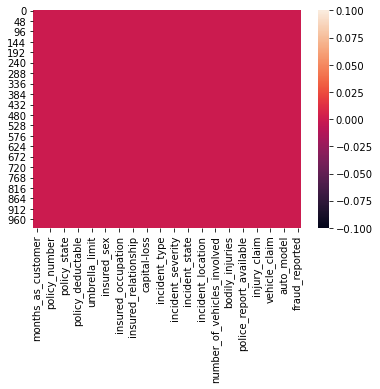

In [222]:
import seaborn as sns
sns.heatmap(df.isnull())

# EDA:
ScatterPlot

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_bind_date'}>,
        <AxesSubplot:title={'center':'policy_state'}>,
        <AxesSubplot:title={'center':'policy_csl'}>],
       [<AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'insured_sex'}>,
        <AxesSubplot:title={'center':'insured_education_level'}>],
       [<AxesSubplot:title={'center':'insured_occupation'}>,
        <AxesSubplot:title={'center':'insured_hobbies'}>,
        <AxesSubplot:title={'center':'insured_relationship'}>,
        <AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot

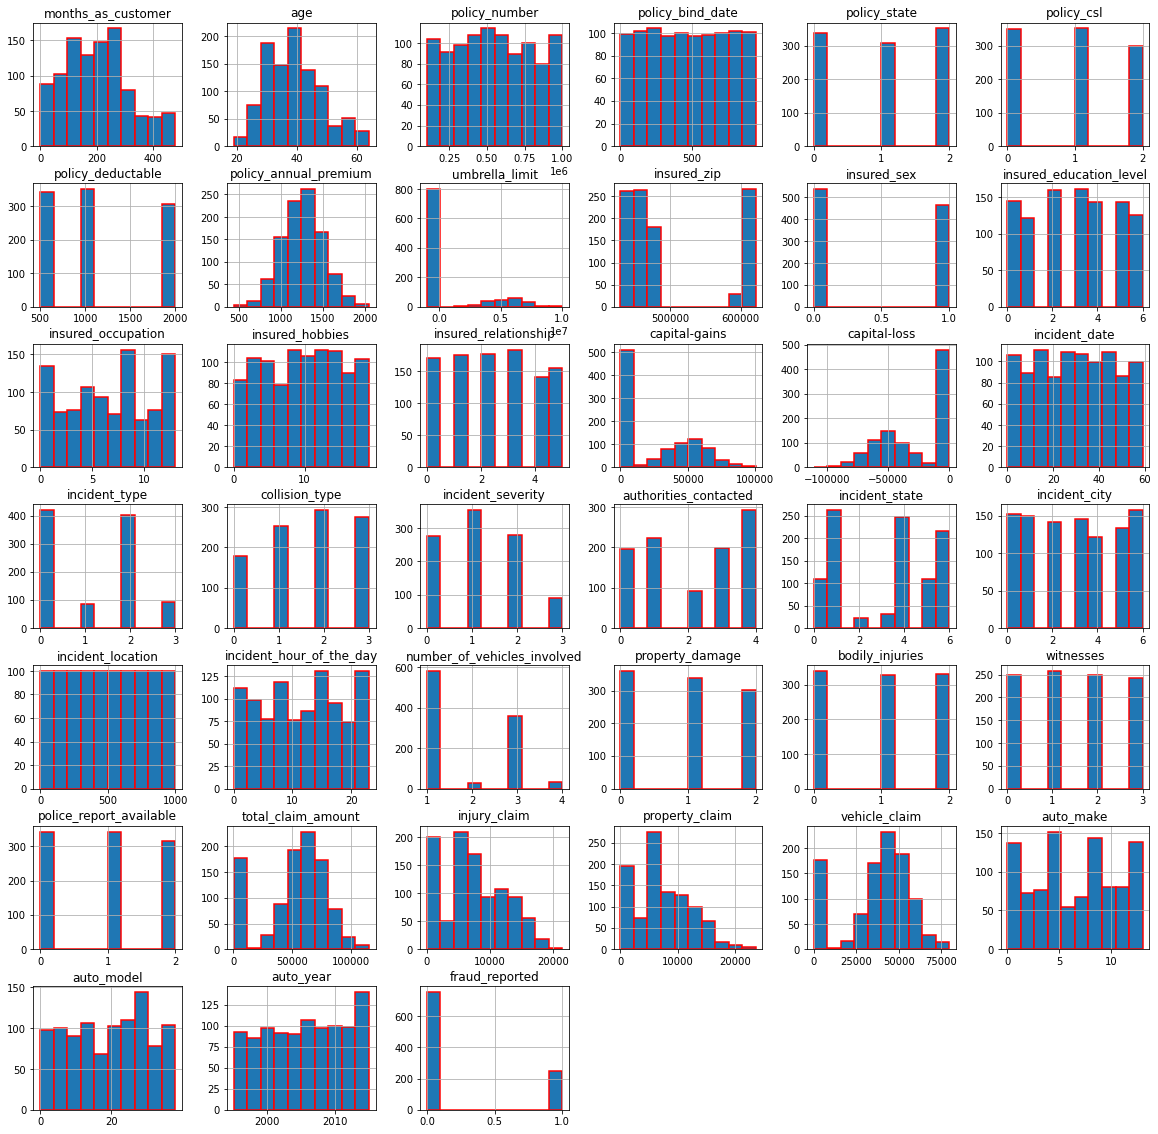

In [223]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

In [224]:
df.corr()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.056538,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,0.045713,0.072815,0.038917,-0.006738,0.022566,0.008968,0.007083,...,-0.012661,0.032019,-0.018009,-0.008762,-0.010678,-0.020184,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.056538,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.037733,-0.024866,-0.042749,...,-0.007004,-0.034920,0.015901,0.024160,0.008611,0.013784,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.014533,0.072815,0.015289,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.038917,0.008486,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,-0.006738,-0.001721,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.037733,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,...,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,-0.024866,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,-0.042749,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,...,0.019805,-0.017607,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368


<AxesSubplot:>

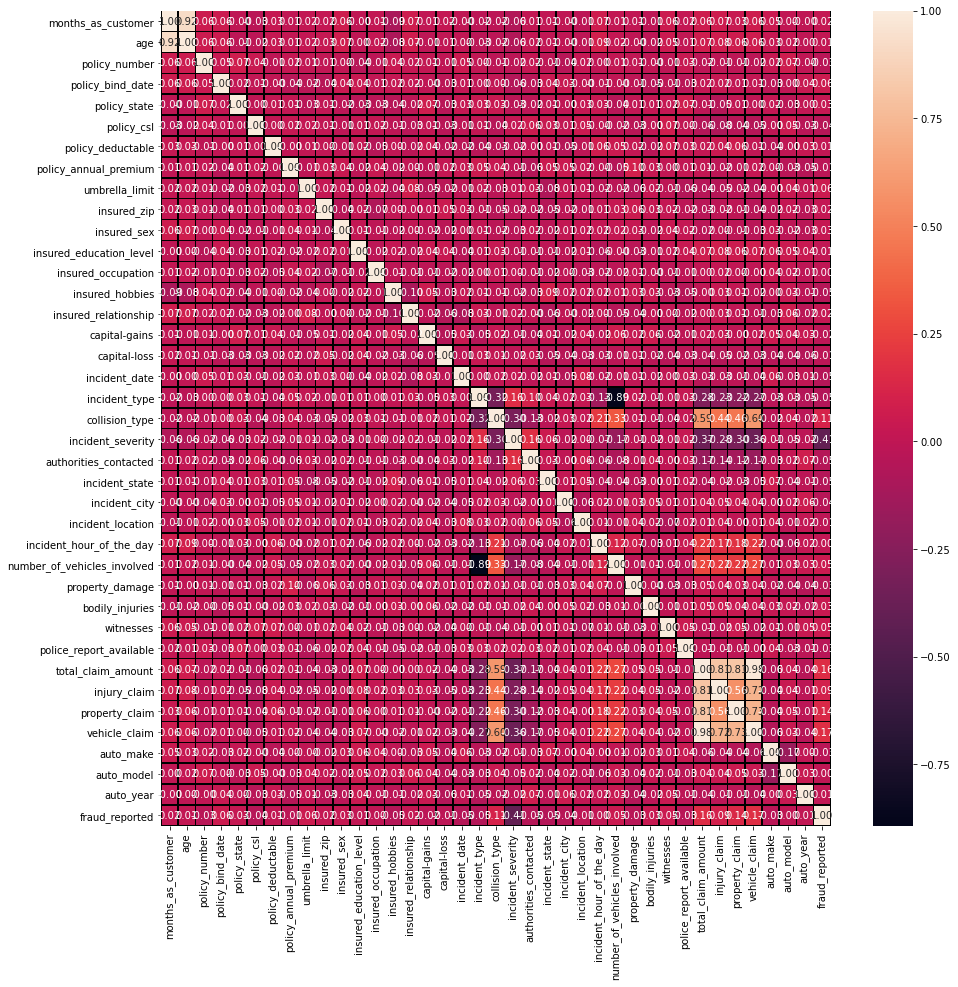

In [225]:
#Correlation using heatmap

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,linecolor="black", fmt='.2f')

In [226]:
#Describe Dataset
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


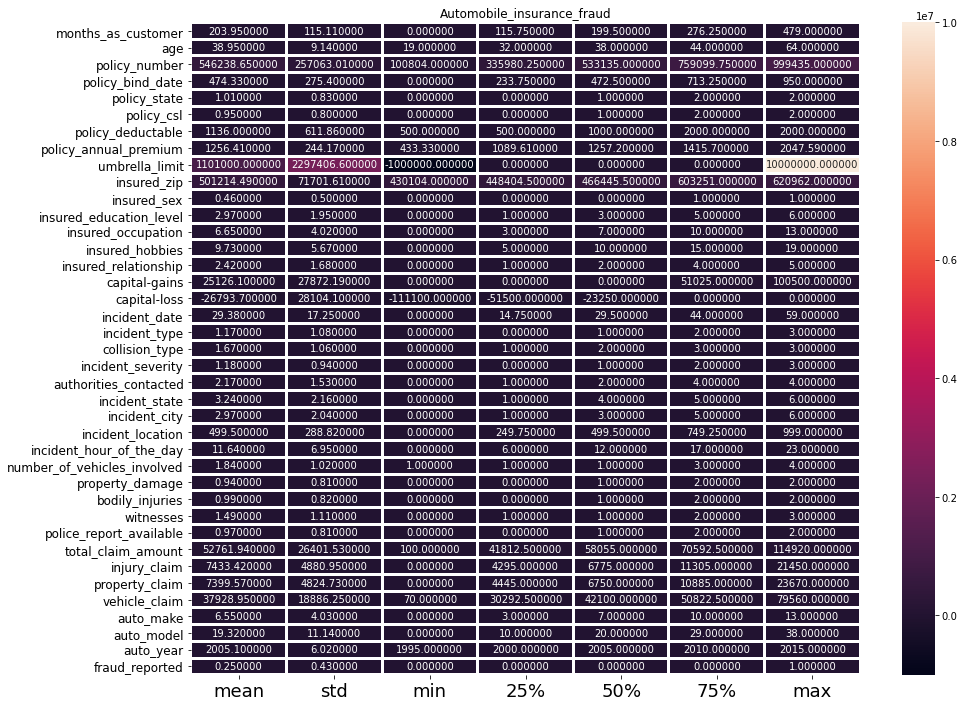

In [227]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Automobile_insurance_fraud")
plt.show()

all stats are above like mean of the data,std of the data,25% of our data,50% of our data, max of our data.in visualization mode also.

<AxesSubplot:>

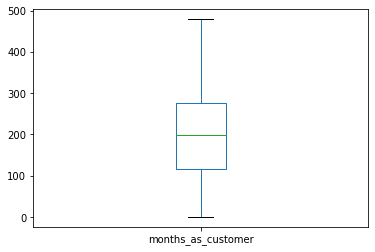

In [228]:
# we are checking outliers here.
df['months_as_customer'].plot.box()

<AxesSubplot:>

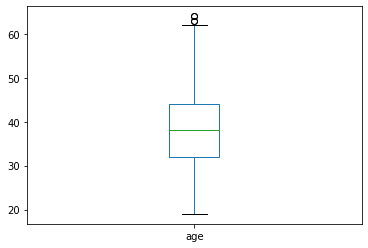

In [229]:
df['age'].plot.box()

<AxesSubplot:>

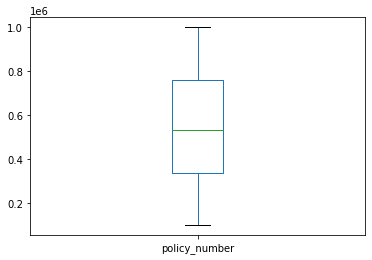

In [230]:
df['policy_number'].plot.box()

<AxesSubplot:>

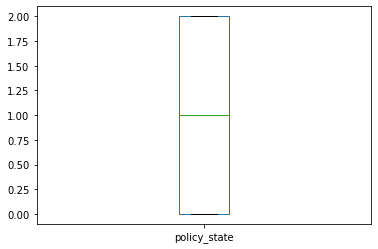

In [231]:
df['policy_state'].plot.box()

<AxesSubplot:>

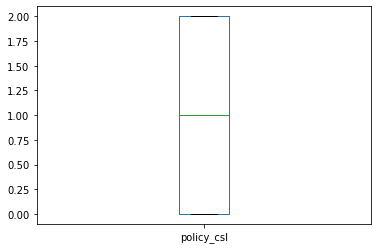

In [232]:
df['policy_csl'].plot.box()

<AxesSubplot:>

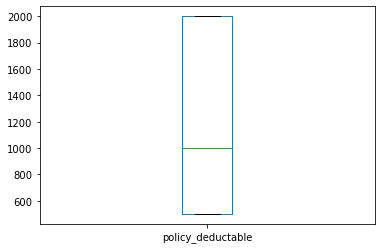

In [233]:
df['policy_deductable'].plot.box()

<AxesSubplot:>

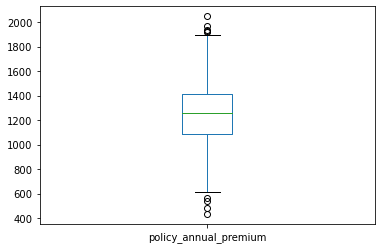

In [234]:
df['policy_annual_premium'].plot.box()

<AxesSubplot:>

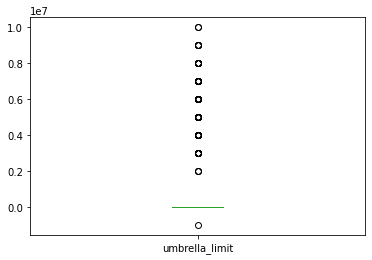

In [235]:
df['umbrella_limit'].plot.box()

<AxesSubplot:>

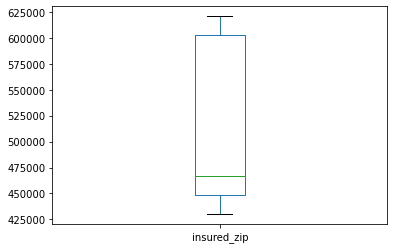

In [236]:
df['insured_zip'].plot.box()

<AxesSubplot:>

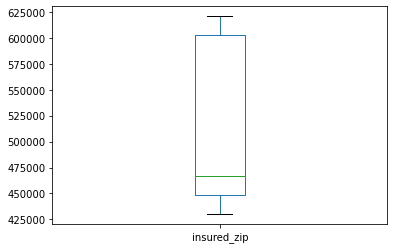

In [237]:
df['insured_zip'].plot.box()

<AxesSubplot:>

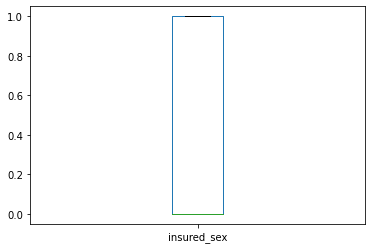

In [238]:
df['insured_sex'].plot.box()

<AxesSubplot:>

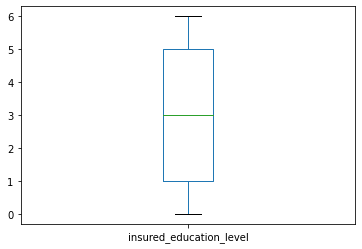

In [239]:
df['insured_education_level'].plot.box()

<AxesSubplot:>

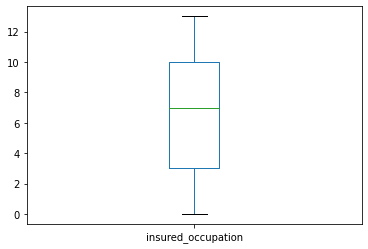

In [240]:
df['insured_occupation'].plot.box()

<AxesSubplot:>

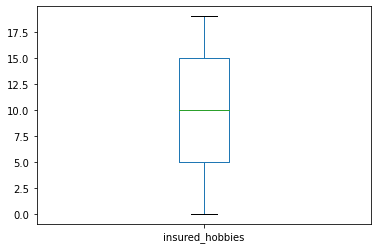

In [241]:

df['insured_hobbies'].plot.box()

<AxesSubplot:>

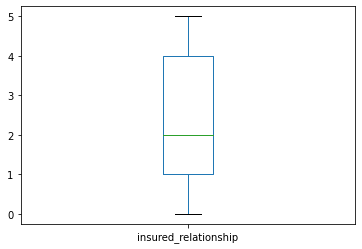

In [242]:
df['insured_relationship'].plot.box()

<AxesSubplot:>

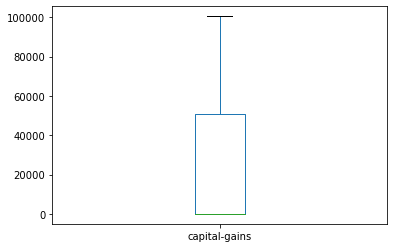

In [243]:
df['capital-gains'].plot.box()

<AxesSubplot:>

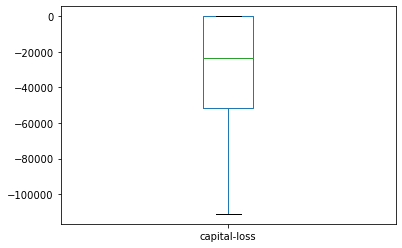

In [244]:
df['capital-loss'].plot.box()

<AxesSubplot:>

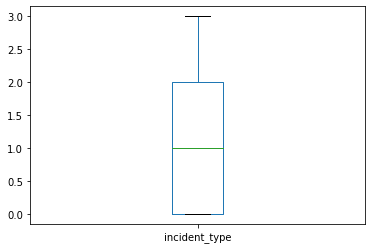

In [245]:
df['incident_type'].plot.box()

<AxesSubplot:>

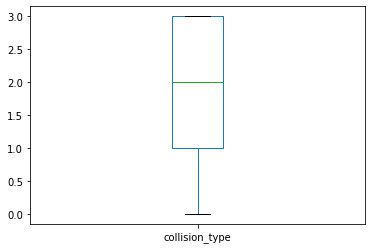

In [246]:
df['collision_type'].plot.box()

<AxesSubplot:>

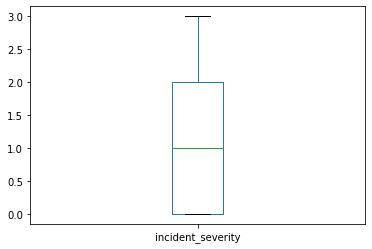

In [247]:
df['incident_severity'].plot.box()

<AxesSubplot:>

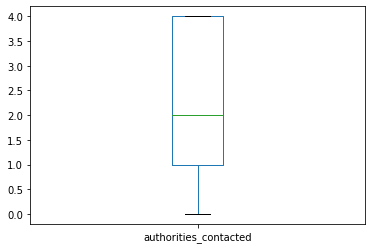

In [248]:
df['authorities_contacted'].plot.box()

<AxesSubplot:>

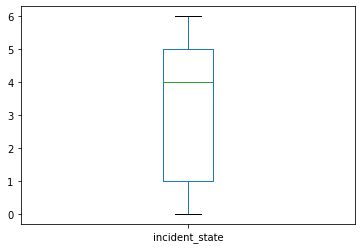

In [249]:
df['incident_state'].plot.box()

<AxesSubplot:>

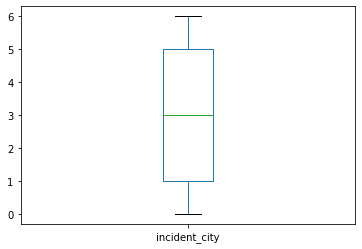

In [250]:
df['incident_city'].plot.box()

<AxesSubplot:>

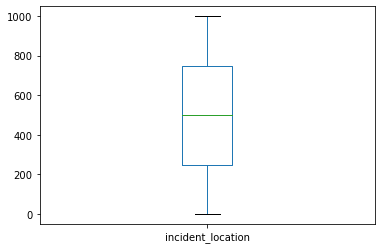

In [251]:
df['incident_location'].plot.box()

<AxesSubplot:>

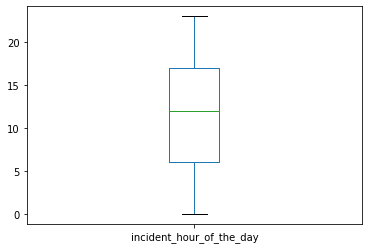

In [252]:
df['incident_hour_of_the_day'].plot.box()

<AxesSubplot:>

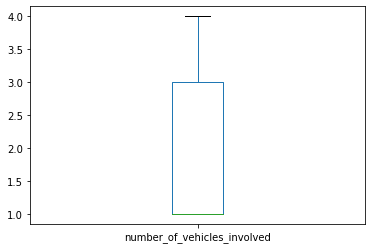

In [253]:
df['number_of_vehicles_involved'].plot.box()

<AxesSubplot:>

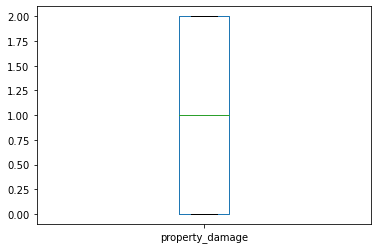

In [254]:
df['property_damage'].plot.box()

<AxesSubplot:>

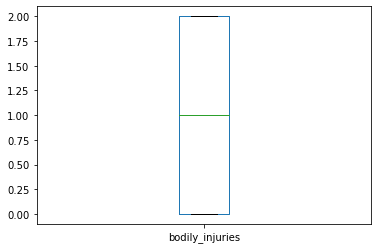

In [255]:
df['bodily_injuries'].plot.box()

<AxesSubplot:>

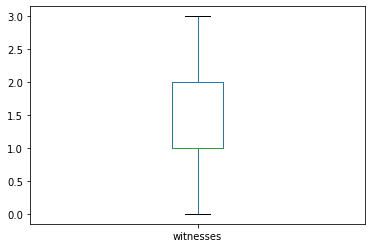

In [256]:
df['witnesses'].plot.box()

<AxesSubplot:>

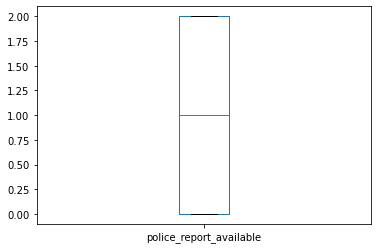

In [257]:
df['police_report_available'].plot.box()

<AxesSubplot:>

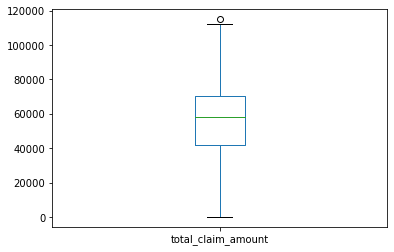

In [258]:
df['total_claim_amount'].plot.box()

<AxesSubplot:>

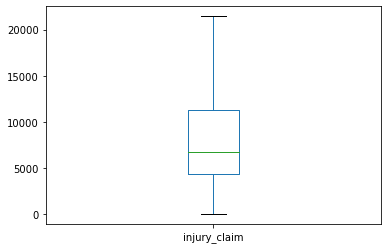

In [259]:
df['injury_claim'].plot.box()

<AxesSubplot:>

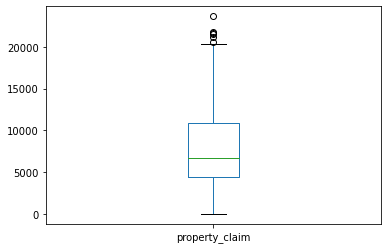

In [260]:
df['property_claim'].plot.box()

<AxesSubplot:>

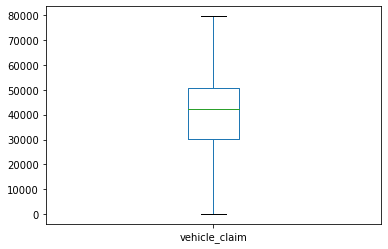

In [261]:
df['vehicle_claim'].plot.box()

<AxesSubplot:>

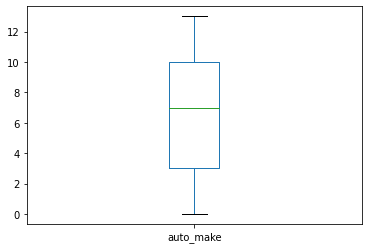

In [262]:
df['auto_make'].plot.box()

<AxesSubplot:>

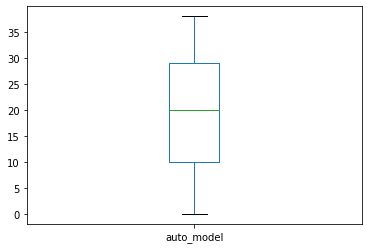

In [263]:
df['auto_model'].plot.box()

<AxesSubplot:>

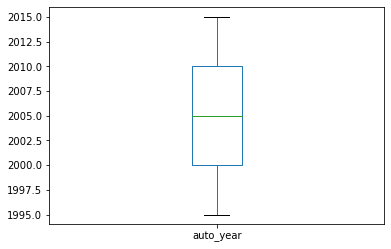

In [264]:
df['auto_year'].plot.box()

<AxesSubplot:>

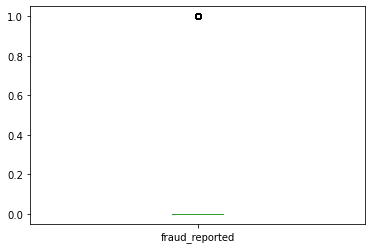

In [265]:
df['fraud_reported'].plot.box()

# Skewness:-

In [266]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


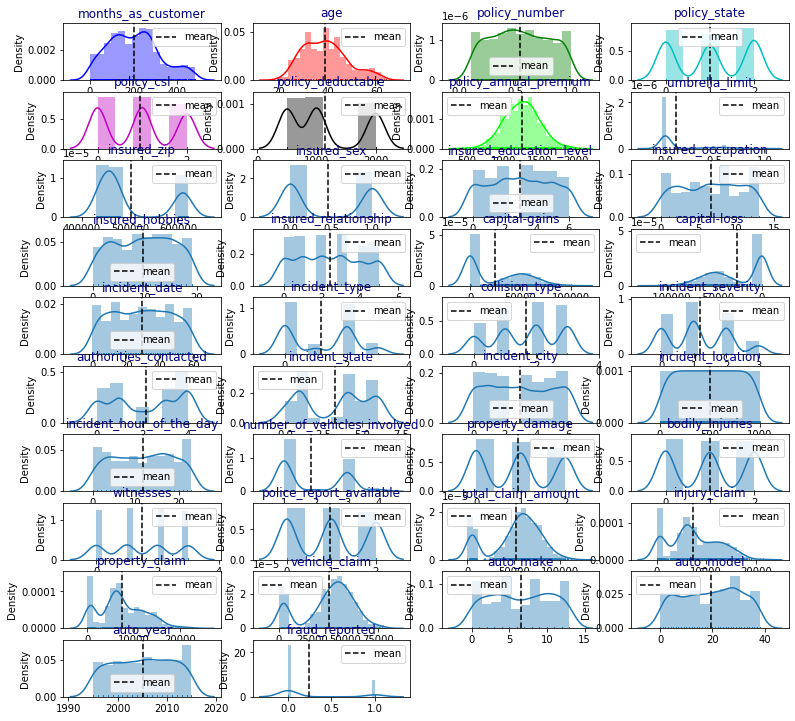

In [267]:
#Now use subplot and displot to check data are normalised or not.

import itertools

cols = ['months_as_customer', 'age', 'policy_number',
        'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(20,4,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# The normal distribution shows that the data is skewed.

In [268]:
#*SP=skewed point.
SP = pd.DataFrame([["-0.008832","incident_location","No","Alot"],["-0.014480","policy_annual_premium","No","Alot"],["-0.014863","capital-loss","No","Alot"],["-0.019173","capital-gains","No","Alot"],["-0.027519","auto_make","No","Alot"],["-0.028159","police_report_available","No","Alot"],["-0.029443","policy_number","No","Alot"],["-0.030497","property_damage","No","Alot"],["-0.037190","policy_csl","No","Alot"],["-0.040403","incident_city","No","Alot"],["-0.045802","authorities_contacted","No","Alot"],["-0.051407","incident_state","No","Alot"]],columns=["Correlation with Target","Column Name","Normalised","Outliers"])
SP

,Correlation with Target,Column Name,Normalised,Outliers
0,-0.008832,incident_location,No,Alot
1,-0.014480,policy_annual_premium,No,Alot
2,-0.014863,capital-loss,No,Alot
3,-0.019173,capital-gains,No,Alot
4,-0.027519,auto_make,No,Alot
5,-0.028159,police_report_available,No,Alot
6,-0.029443,policy_number,No,Alot
7,-0.030497,property_damage,No,Alot
8,-0.037190,policy_csl,No,Alot
9,-0.040403,incident_city,No,Alot


# Removing Outliers:

In [269]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))

In [270]:
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
         8,  8,  8], dtype=int64))

In [271]:
df1=df[(z<3).all(axis=1)]
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [272]:
# Here we can check shape both of the dataset.
df.shape,df1.shape

((1000, 39), (980, 39))

# Percentage loss of data while removing ourliers

In [273]:
percentage_loss=((1000-980)/1000)*100
print(percentage_loss)

2.0


In [274]:
df.keys()

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [275]:
x = df1[['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported',]]
y = df1['fraud_reported']

In [276]:
# Here we can check our seperation of our data in 2 variable x and y.
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [277]:
y.head(2)

0    1
1    1
Name: fraud_reported, dtype: int32

# Transforming data to remove skewness.

In [278]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.04454111,  1.0023305 , -0.02347493, ..., -1.80721231,
        -0.20443508,  1.75594229],
       [ 0.29904549,  0.42717141, -0.74401221, ..., -0.57848628,
         0.29587688,  1.75594229],
       [-0.51581942, -1.13601305,  0.58680474, ...,  0.9504262 ,
         0.29587688, -0.5694948 ],
       ...,
       [-0.55427228, -0.47059792,  1.37172562, ...,  0.05320514,
        -1.49935977, -0.5694948 ],
       [ 1.90408801,  2.12107486,  0.02357929, ..., -1.29996796,
        -1.18090064, -0.5694948 ],
       [ 1.89156317,  1.97656406,  0.10716503, ..., -0.57848628,
         0.29587688, -0.5694948 ]])

In [279]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.04454111,  1.0023305 , -0.02347493, ..., -1.80721231,
        -0.20443508,  1.75594229],
       [ 0.29904549,  0.42717141, -0.74401221, ..., -0.57848628,
         0.29587688,  1.75594229],
       [-0.51581942, -1.13601305,  0.58680474, ...,  0.9504262 ,
         0.29587688, -0.5694948 ],
       ...,
       [-0.55427228, -0.47059792,  1.37172562, ...,  0.05320514,
        -1.49935977, -0.5694948 ],
       [ 1.90408801,  2.12107486,  0.02357929, ..., -1.29996796,
        -1.18090064, -0.5694948 ],
       [ 1.89156317,  1.97656406,  0.10716503, ..., -0.57848628,
         0.29587688, -0.5694948 ]])

# Since the outcome has only two variable we will use binary classification model.

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

# Splitting the dataframe:

In [281]:
# Here we are splitting our data in training and testing.
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", accuracy_score(y_test,pred_test)*100)
        print("\n")

At random state 0  The model performs very well
At random_state:- 0
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


At random state 1  The model performs very well
At random_state:- 1
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


At random state 2  The model performs very well
At random_state:- 2
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


At random state 3  The model performs very well
At random_state:- 3
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


At random state 4  The model performs very well
At random_state:- 4
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


At random state 5  The model performs very well
At random_state:- 5
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


At random state 6  The model performs very well
At random_state:- 6
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


At random state 7  The model performs very well
At random_state:- 7
Training r2_score is:- 100.0
Testing r2_sco

# Random Forest Classifier:-

In [282]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(x_train, y_train)
prediction1 = model1.predict(x_test)

print("Acc on training data: {:,.3f}".format(rfc.score(x_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(x_test, y_test)))

Acc on training data: 1.000
Acc on test data: 1.000


# Logistic Regression:-

In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(x_train,y_train)
predicted = model.predict(x_test)


print("Acc on training data: {:,.3f}".format(lr.score(x_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(x_test, y_test)))

Acc on training data: 1.000
Acc on test data: 1.000


In [284]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.svm import SVR


knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print('dtc score:',knr.score(x_train,y_train))

knrpredict = knr.predict(x_test)
print('dtc r2_score:', r2_score(y_test,knrpredict))

print("Mean squared error of dtc =",mean_squared_error(y_test,knrpredict))
print("Root Mean squared error of dtc =",np.sqrt(mean_squared_error(y_test,knrpredict)))

dtc score: 0.7537055547622448
dtc r2_score: 0.6429700854700855
Mean squared error of dtc = 0.06959183673469388
Root Mean squared error of dtc = 0.26380264732313413


In [285]:
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print('dtc score:',dtc.score(x_train,y_train))

dtcpredict = dtc.predict(x_test)
print('dtc r2_score:', r2_score(y_test,dtcpredict))

print("Mean squared error of dtc =",mean_squared_error(y_test,dtcpredict))
print("Root Mean squared error of dtc =",np.sqrt(mean_squared_error(y_test,dtcpredict)))

dtc score: 1.0
dtc r2_score: 1.0
Mean squared error of dtc = 0.0
Root Mean squared error of dtc = 0.0


In [286]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42)
#RandomForestClassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(predrf)

print('Rf score:',rf.score(x_train,y_train))

print('rf r2_score:', r2_score(y_test,predrf))

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0.]
Rf score: 1.0
rf r2_score: 1.0


In [287]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=50,random_state=42)

ada.fit(x_train,y_train)
predata=ada.predict(x_test)

print(predata)

print('Rf score: ',ada.score(x_train,y_train))
print('ADA r2_score:', r2_score(y_test,predata))

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0.]
Rf score:  1.0
ADA r2_score: 1.0


In [288]:
from sklearn.ensemble import GradientBoostingRegressor
grid = GradientBoostingRegressor()

grid.fit(x_train,y_train)
predgrid=ada.predict(x_test)

print(predgrid)

print('Rf score: ',grid.score(x_train,y_train))

print('ADA r2_score:', r2_score(y_test,predgrid))

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0.]
Rf score:  0.9999999992944921
ADA r2_score: 1.0


In [297]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=141)

In [298]:
# Here classification report is showing
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       157
           1       0.21      0.28      0.24        39

    accuracy                           0.65       196
   macro avg       0.51      0.51      0.51       196
weighted avg       0.69      0.65      0.67       196



# Cross validation score for logistic Regression:

In [299]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:-",j)
    print("Cross Validation Score is:-",lsc*100 )
    print("Accuracy_score is:-",lss*100)
    print("\n")

At cv:- 2
Cross Validation Score is:- 100.0
Accuracy_score is:- 100.0


At cv:- 3
Cross Validation Score is:- 100.0
Accuracy_score is:- 100.0


At cv:- 4
Cross Validation Score is:- 100.0
Accuracy_score is:- 100.0


At cv:- 5
Cross Validation Score is:- 100.0
Accuracy_score is:- 100.0


At cv:- 6
Cross Validation Score is:- 100.0
Accuracy_score is:- 100.0


At cv:- 7
Cross Validation Score is:- 100.0
Accuracy_score is:- 100.0


At cv:- 8
Cross Validation Score is:- 100.0
Accuracy_score is:- 100.0


At cv:- 9
Cross Validation Score is:- 100.0
Accuracy_score is:- 100.0




In [300]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ", lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  1.0 
The accuracy score is:  1.0


# The Model with the outliers:

# AUC ROC Curve:

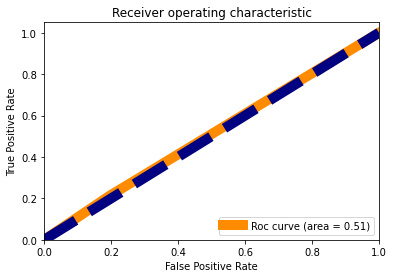

In [301]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=10, label='Roc curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy',lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Since the model without outliers performs well!! We will select that dataframe.

# Model Saving:

In [302]:
import pickle
filename = 'Automobile_insurance_fraud'
pickle.dump(lr, open(filename, 'wb'))

# Conclusion:

In [305]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
191,0,0
192,0,0
193,0,0
194,0,0
